In [1]:
import sqlite3 as sql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium.plugins import HeatMap
from IPython.display import display
from pandas.api.types import CategoricalDtype
from pylab import rcParams
from IPython.display import IFrame
from IPython.core.display import HTML
import folium
from folium.plugins import MarkerCluster


In [2]:

con = sql.connect("crime_final_updated.db")
df=pd.read_sql_query("select INCIDENT_NUBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT ,REPORTING_AREA,SHOOTING,OCCURENCE_ON_DATE ,YEAR,MONTH ,DAY_OF_WEEK ,HOUR,UCR_PART ,STREET ,LAT,Long ,LOCATION,OFFENSE_CODE.Name FROM CRIME INNER JOIN OFFENSE_CODE ON Crime.OFFENSE_CODE=OFFENSE_CODE.Code;",con)
df.head()

,INCIDENT_NUBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,OCCURENCE_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LAT,Long,LOCATION,NAME
0,I182070945,619,Larceny,Brighton,808,,9/2/2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.3578,-71.1394,"(42.35779134, -71.13937053)",LARCENY ALL OTHERS
1,I182070943,1402,Vandalism,Dorchester,347,,8/21/2018 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.3068,-71.0603,"(42.30682138, -71.06030035)",VANDALISM
2,I182070941,3410,Towed,South End,151,,9/3/2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.3466,-71.0724,"(42.34658879, -71.07242943)",TOWED MOTOR VEHICLE
3,I182070940,3114,Investigate Property,South End,272,,9/3/2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.3342,-71.0787,"(42.33418175, -71.07866441)",INVESTIGATE PROPERTY
4,I182070938,3114,Investigate Property,Mattapan,421,,9/3/2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.2754,-71.0904,"(42.27536542, -71.09036101)",INVESTIGATE PROPERTY


In [3]:
df["OCCURENCE_ON_DATE"] = pd.to_datetime(df["OCCURENCE_ON_DATE"])
df['LAT'].replace('', np.nan, inplace=True)
df['Long'].replace('', np.nan, inplace=True)

df.replace('', np.nan, inplace=True)
df.replace(-1, np.nan, inplace=True)



df["LAT"].replace(-1, np.nan, inplace=True)
df["Long"].replace(-1, np.nan, inplace=True)
df.dropna(subset=['LAT'], inplace=True)
df.dropna(subset=['Long'], inplace=True)

In [4]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,INCIDENT_NUBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,OCCURENCE_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LAT,Long,LOCATION,NAME
1295,I182069509,413,Aggravated Assault,Hyde Park,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)",ASSAULT - AGGRAVATED - BATTERY
1860,I182068876,413,Aggravated Assault,Rox Bury,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)",ASSAULT - AGGRAVATED - BATTERY
3259,I182067317,111,Homicide,Rox Bury,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)","MURDER, NON-NEGLIGIENT MANSLAUGHTER"
3260,I182067317,2662,Ballistics,Rox Bury,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)",BALLISTICS EVIDENCE/FOUND
4107,I182066420,413,Aggravated Assault,Charlestown,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)",ASSAULT - AGGRAVATED - BATTERY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317369,I152051161,413,Aggravated Assault,Rox Bury,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part One,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)",ASSAULT - AGGRAVATED - BATTERY
317370,I152051161,1503,Firearm Violations,Rox Bury,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Two,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)","WEAPON - OTHER - CARRYING / POSSESSING, ETC"
317371,I152051161,3125,Warrant Arrests,Rox Bury,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Three,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)",WARRANT ARREST
317567,I152050961,413,Aggravated Assault,Rox Bury,286,Y,2015-06-19 21:20:00,2015,6,Friday,21,Part One,KERR WAY,42.333584,-71.085543,"(42.33358389, -71.08554259)",ASSAULT - AGGRAVATED - BATTERY


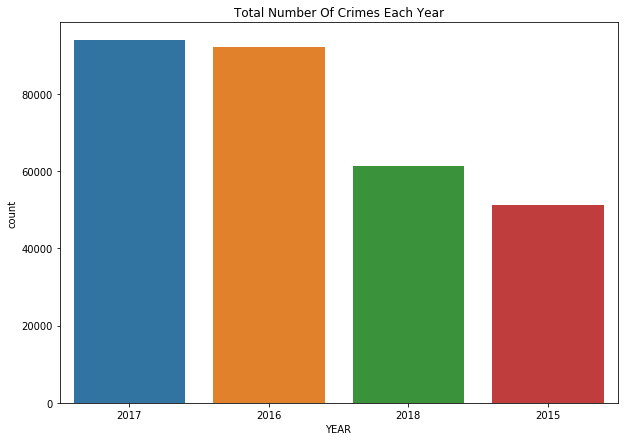

In [5]:
ax,fig = plt.subplots(figsize=(10,7))
sns.countplot(x = 'YEAR',
              data = df,
              order = df['YEAR'].value_counts().index)
plt.title('Total Number Of Crimes Each Year')

plt.show()

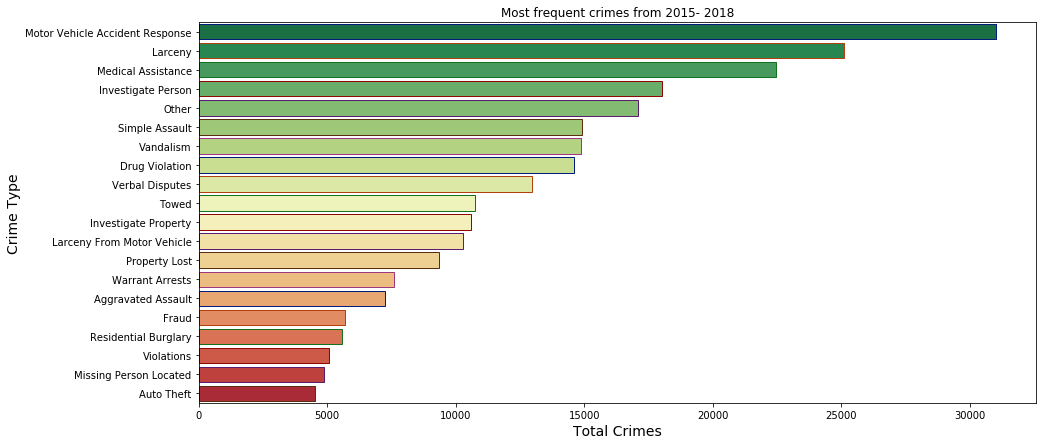

In [6]:

ax,fig = plt.subplots(figsize=(15,7))
sns.countplot(y = 'OFFENSE_CODE_GROUP',
              data = df,
              order = df['OFFENSE_CODE_GROUP'].value_counts()[:20].index,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.title('Most frequent crimes from 2015- 2018')
plt.ylabel("Crime Type", fontsize=14) 
plt.xlabel("Total Crimes", fontsize=14) 

plt.show()

In [7]:
Motveh_accident = df[df["OFFENSE_CODE_GROUP"] == "Motor Vehicle Accident Response"] 

In [8]:
larceny = df[df["OFFENSE_CODE_GROUP"] == "Larceny"] 

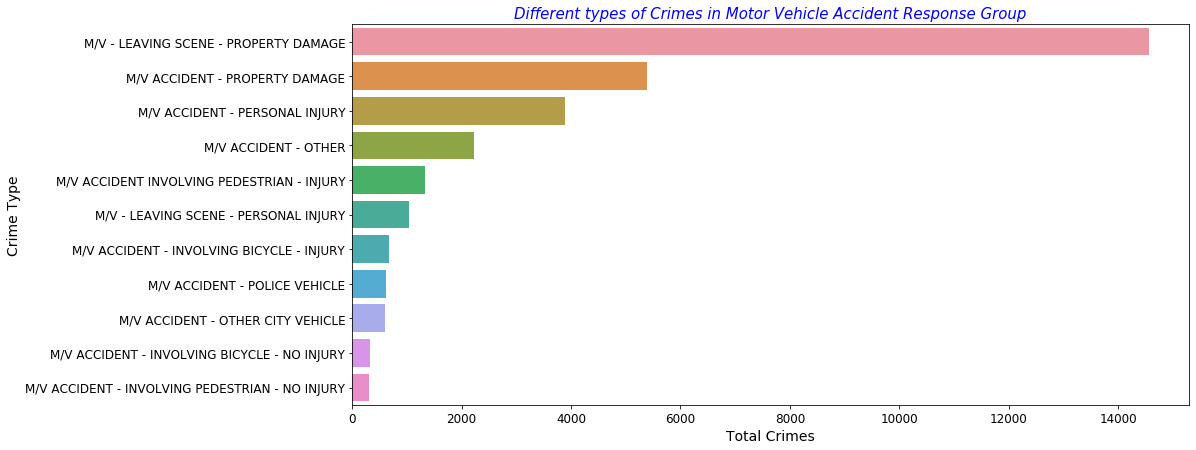

In [9]:
ax,fig = plt.subplots(figsize=(15,7))
sns.countplot(y = Motveh_accident["NAME"],  data=Motveh_accident,order = Motveh_accident["NAME"].value_counts().index)
plt.title("Different types of Crimes in Motor Vehicle Accident Response Group", fontsize=15, fontweight=0, color='blue', style='oblique')
plt.ylabel("Crime Type", fontsize=14)
plt.xlabel("Total Crimes", fontsize=14)
fig.tick_params(labelsize=12)

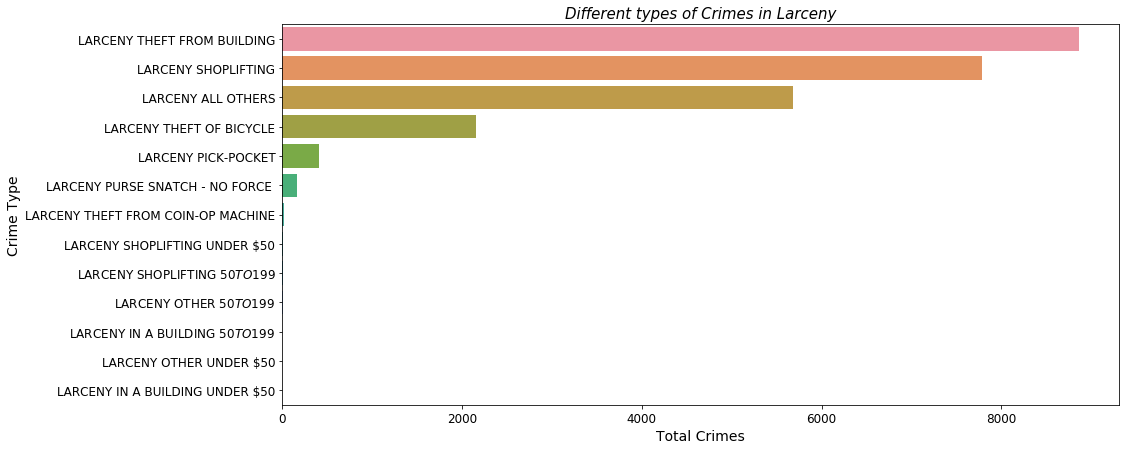

In [10]:

ax,fig = plt.subplots(figsize=(15,7))
sns.countplot(y = larceny["NAME"],  data=larceny,order = larceny["NAME"].value_counts().index)
plt.title("Different types of Crimes in Larceny", fontsize=15, fontweight=0, color='black', style='italic')
plt.ylabel("Crime Type", fontsize=14)
plt.xlabel("Total Crimes", fontsize=14)
fig.tick_params(labelsize=12)

Text(0.5, 1, '')

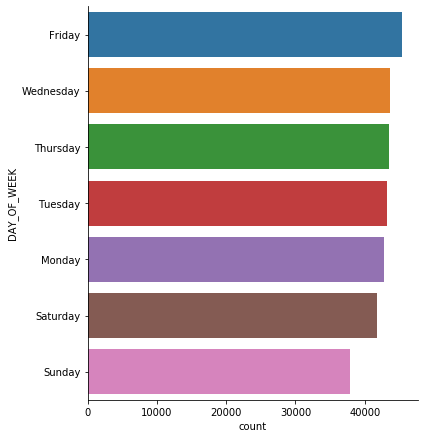

In [11]:
sns.catplot(y='DAY_OF_WEEK',
            kind='count',
            height=6, 
            aspect=1,
            order=df.DAY_OF_WEEK.value_counts().index,
            data=df)
plt.title("")

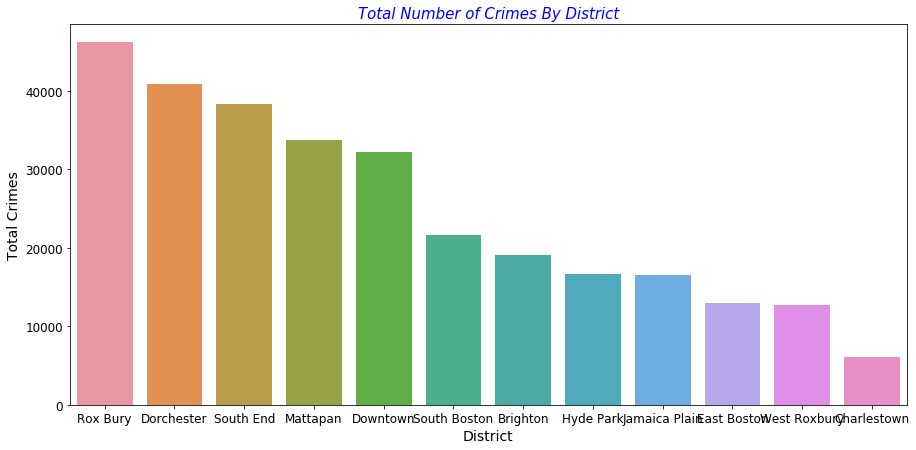

In [12]:
ax,fig = plt.subplots(figsize=(15,7))
sns.countplot(x = 'DISTRICT',data = df,order = df['DISTRICT'].value_counts().index)
plt.title("Total Number of Crimes By District", fontsize=15, fontweight=0, color='blue', style='oblique')
plt.ylabel("Total Crimes", fontsize=14)
plt.xlabel("District", fontsize=14)
fig.tick_params(labelsize=12)





plt.show()

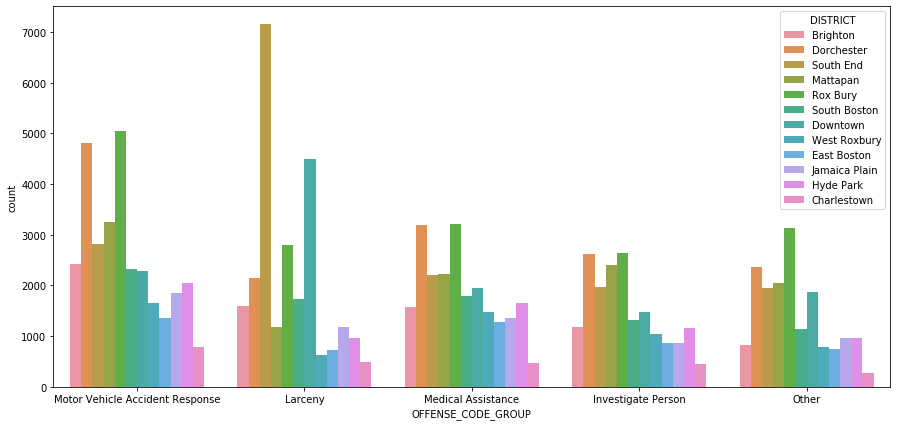

In [13]:
ax,fig = plt.subplots(figsize=(15,7))
order = df["OFFENSE_CODE_GROUP"].value_counts().head(5).index
sns.countplot(data = df, x='OFFENSE_CODE_GROUP',hue='DISTRICT', order = order);

In [14]:
perday_crime = df.set_index("OCCURENCE_ON_DATE")

In [15]:
guncrime_df = perday_crime[perday_crime["SHOOTING"] == "Y"] 
perday_guncrime = pd.DataFrame(guncrime_df.resample("M").size()) 
perday_guncrime["mean"] = guncrime_df.resample("M").size().mean()


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


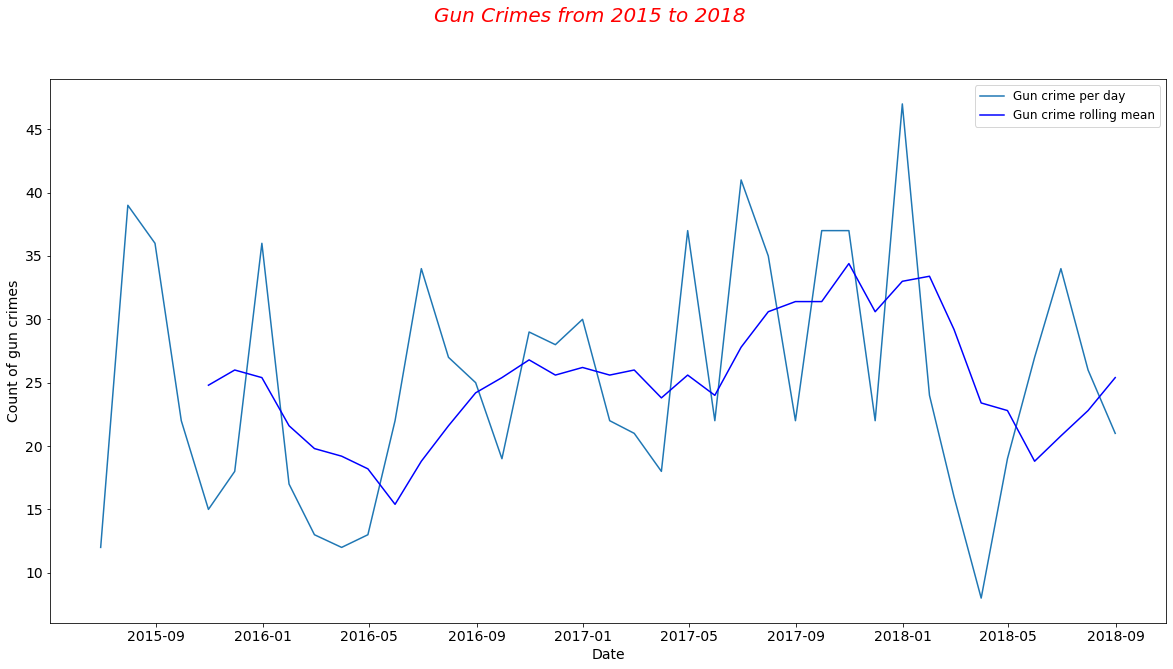

In [16]:
fig, ax = plt.subplots(figsize=(20, 10)) 
ax.plot(perday_guncrime[[0]], label = "Gun crime per day") 
ax.plot(perday_guncrime[[0]].rolling(window=5).mean(), color = "blue", label="Gun crime rolling mean") 
plt.suptitle("Gun Crimes from 2015 to 2018", fontsize=20, fontweight=0, color='red', style='oblique') 
plt.legend(loc=0, fontsize="large") 
plt.ylabel("Count of gun crimes", fontsize=14) 
plt.xlabel("Date", fontsize=14) 
plt.tick_params(labelsize=14)


In [17]:
crimes_using_guns = guncrime_df["OFFENSE_CODE_GROUP"].value_counts()[:10]
top_gun_crimes = guncrime_df[guncrime_df["OFFENSE_CODE_GROUP"].isin(crimes_using_guns.index)]

Text(0.5, 0, 'Total Crimes')

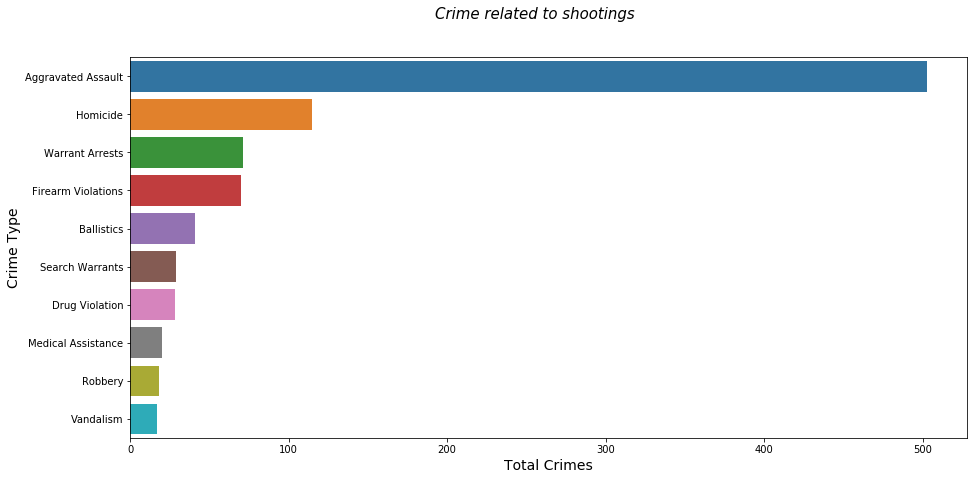

In [18]:
ax,fig = plt.subplots(figsize=(15,7))
sns.countplot(y = top_gun_crimes["OFFENSE_CODE_GROUP"], order=crimes_using_guns.index, data=top_gun_crimes)
plt.suptitle("Crime related to shootings", fontsize=15, fontweight=0, color='black', style='italic')
plt.ylabel("Crime Type", fontsize=14)
plt.xlabel("Total Crimes", fontsize=14)

In [19]:

gun_crime_df = df[['INCIDENT_NUBER','DISTRICT', 'SHOOTING','LAT', 'Long']]
location_Occurences_guncrime = gun_crime_df[gun_crime_df["SHOOTING"] == "Y"] 

Text(0.5, 1.0, 'Shooting Crime Locations')

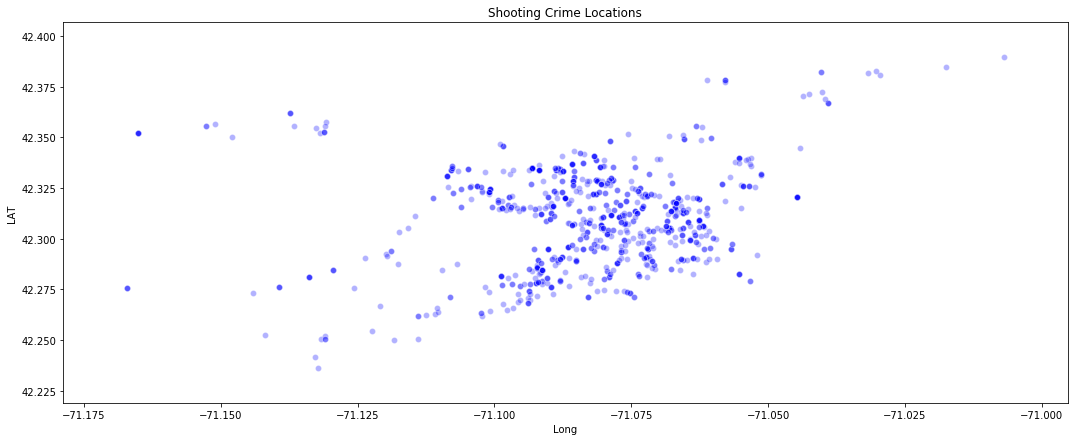

In [20]:
fig, axes = plt.subplots(figsize = (18, 7))
sns.scatterplot(y = 'LAT',
                x = 'Long',
                alpha = 0.3,
                data = gun_crime_df[gun_crime_df["SHOOTING"]=="Y"],color='blue' )
plt.title("Shooting Crime Locations")


Text(0.5, 1, 'Crime Rate by week and hour')

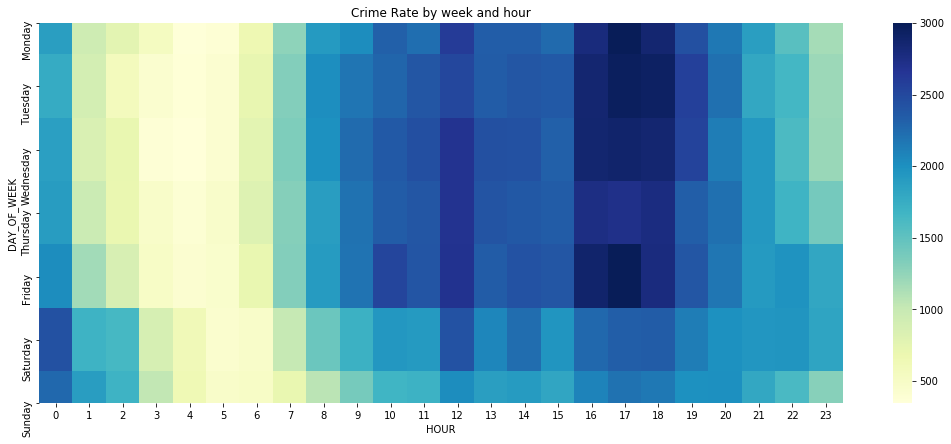

In [21]:
df["DAY_OF_WEEK"] = pd.Categorical(df["DAY_OF_WEEK"], 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
timeOccurencesNormal = df[['INCIDENT_NUBER','OCCURENCE_ON_DATE', 'YEAR', 'MONTH', 'SHOOTING',
                           'DAY_OF_WEEK', 'HOUR']]
fig, axes = plt.subplots( figsize = (18, 7))

sns.heatmap(pd.pivot_table(data = timeOccurencesNormal, index = "DAY_OF_WEEK", 
                              columns = "HOUR", values = "INCIDENT_NUBER", aggfunc = 'count'), 
               cmap = 'YlGnBu')
plt.title("Crime Rate by week and hour")




In [22]:
df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [23]:
df['SHOOTING'].replace('', 'N', inplace=True)

In [24]:
df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [25]:
crime_shoot=pd.pivot_table(df.loc[df['SHOOTING']=='Y',['YEAR','DISTRICT','SHOOTING']], \
               index='YEAR',columns='DISTRICT',aggfunc=np.count_nonzero)

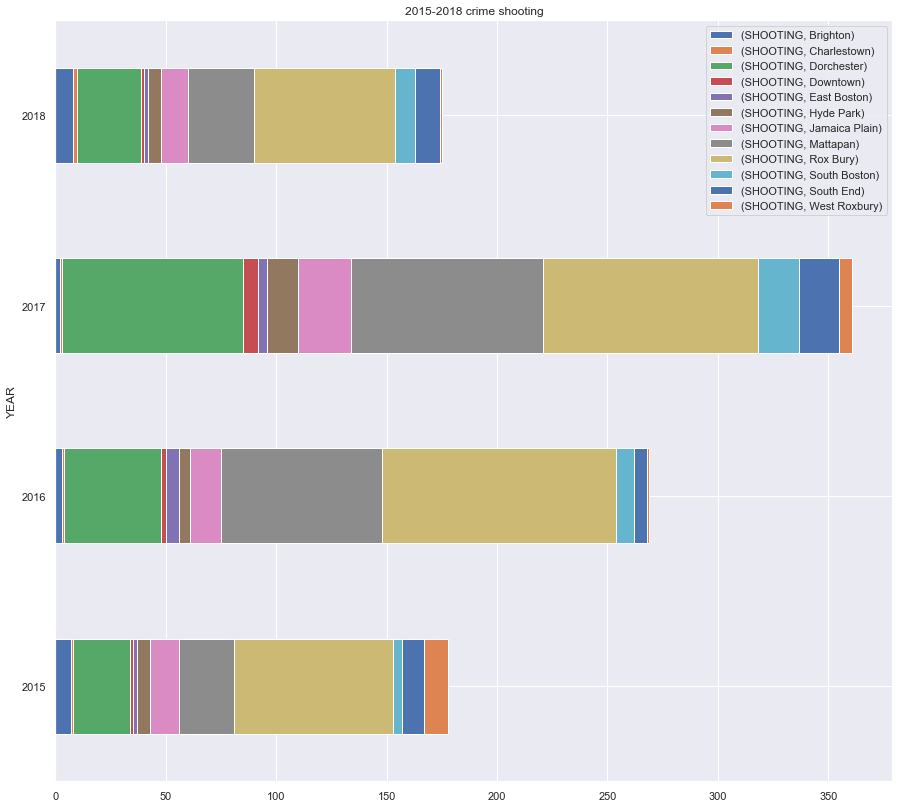

In [26]:
sns.set()
p4=crime_shoot.plot(title=r'2015-2018 crime shooting',figsize=(15,14),kind='barh',stacked=True)

p4fig=p4.get_figure()
plt.legend(loc=0)
plt.show()

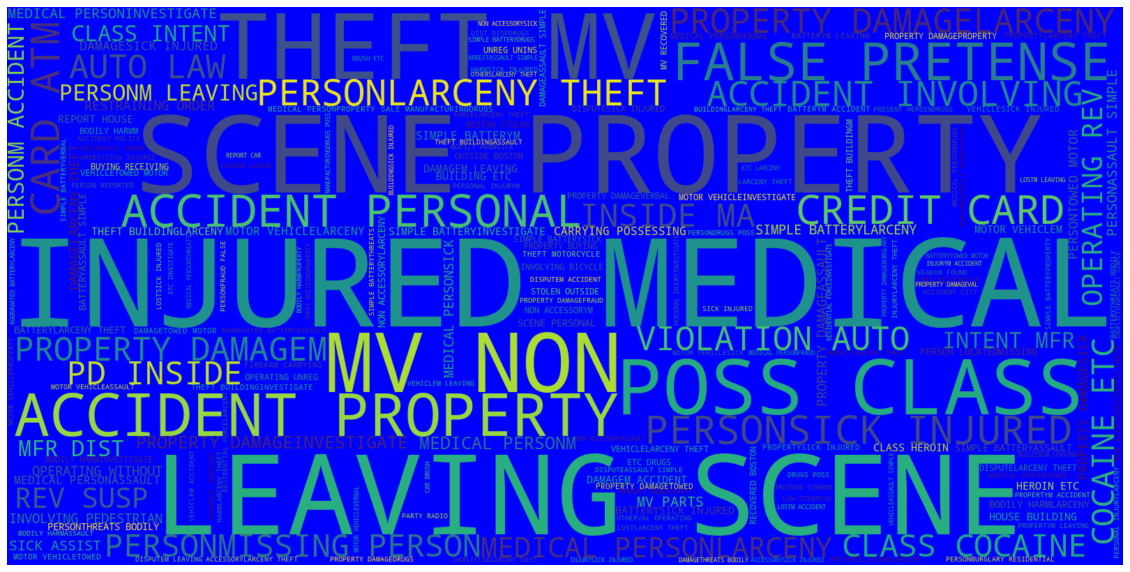

In [27]:
from wordcloud import WordCloud
text = []
for i in df.NAME:
    text.append(i)
text = ''.join(map(str, text)) #Now we make all of them like this [LarencyHomicideRobbery]

wordcloud = WordCloud(width=1600, height=800, max_font_size=300,background_color='blue').generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
df_incident = df.groupby('INCIDENT_NUBER')['YEAR'].count().sort_values(ascending = False)
df_incident = pd.DataFrame({'INCIDENT_NUBER': df_incident.index, 'NUM_RECORDS': df_incident.values})
Crimes = df.merge(df_incident[df_incident['NUM_RECORDS'] > 5], on = 'INCIDENT_NUBER', how = 'inner')
Crimes = Crimes[['INCIDENT_NUBER', 'LAT','Long']].drop_duplicates()[['LAT','Long']].dropna()

In [29]:
boston_shooting_map = folium.Map(location=[42.3601, -71.0589],
              zoom_start = 12)
shooting_location = guncrime_df[["LAT", "Long"]]
shooting_location.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
HeatMap(shooting_location, radius = 20).add_to(boston_shooting_map)
display(boston_shooting_map)

In [31]:

boston_map = folium.Map(location=[42.361145,-71.057083], zoom_start = 12, min_zoom=12) 

heatmap_df = df[df['YEAR']==2017]

heatmap_df = df[['OFFENSE_CODE_GROUP']] 
heatmap_df = df[['LAT', 'Long']] 

folium.CircleMarker([42.28788933,-71.12658585], radius=60, popup='Homicide', color='red', ).add_to(boston_map) 
heat_crime_data = [[row['LAT'],row['Long']] 
             for index, row in heatmap_df.iterrows()]

HeatMap(heat_crime_data, radius=10).add_to(boston_map) 
hm_wide = HeatMap(heat_crime_data, min_opacity=0.1, radius=15,
                  blur=15, max_zoom=10)
boston_map.add_child(hm_wide)

boston_map.add_child(folium.ClickForMarker(popup='Potential Crime Location'))
boston_map.save('_map.html')

IFrame('_map.html', width=1000, height=700)

In [32]:


boston_map= folium.Map(location = [Crimes['LAT'].mean(), 
                                  Crimes['Long'].mean()], 
                      zoom_start = 12)
marker = MarkerCluster()
#creating a Marker for each point. 
for row in Crimes.itertuples():
    marker.add_child(folium.Marker(location = [row.LAT,  row.Long]))

boston_map.add_child(marker)

boston_map